In [1]:
import gedsk

In [2]:
filename = "geqdsks\ITER_10MA.geqdsk"
data = gedsk.read_gedsk(filename)
psi = gedsk.get_psi(data)

In [3]:
bounds = gedsk.get_bounds(data)
x, y = gedsk.get_xy(data)
spline = gedsk.get_spline_for_psi(psi, x, y)
all_critical_ponts = gedsk.find_all_critical_points(spline, bounds)

In [4]:
all_critical_ponts

{(2.5, -6.0),
 (2.5, -2.9320236272877063),
 (2.5, -2.932006730709692),
 (2.5, -2.9319771969070003),
 (2.5, -2.9319740533828718),
 (2.5, -2.931966145833333),
 (2.5, -0.28266998926798453),
 (2.5, -0.28266229405998744),
 (2.5, -0.28265989546974546),
 (2.5, 0.7122872840613053),
 (2.5, 0.7123046874999992),
 (2.5, 3.406541635592778),
 (2.5, 3.406575520833332),
 (2.5, 5.1737792968750025),
 (2.5, 5.173796309158205),
 (2.5, 6.0),
 (2.6482486736213873, -4.923963198500888),
 (2.858435909310595, 0.39860468807580884),
 (2.9227927223136136, 5.261622147444274),
 (2.969539035107908, -4.827674910609583),
 (3.2200777000455236, -4.749454038228359),
 (3.3153132727671455, -4.728156012650269),
 (3.350854901931655, 0.3067932240480091),
 (3.420447334428278, 5.437698756167327),
 (3.76464716640206, 5.712616856956168),
 (3.807301248579076, 0.36531291891464357),
 (3.9303344726562495, 6.0),
 (3.9303515625000003, 6.0),
 (3.9773840338684496, -4.8483118197020545),
 (4.135434599324901, -4.978236560540532),
 (4.1768813

In [5]:
gedsk.plotly_psi_spline(spline, x, y, points = all_critical_ponts)

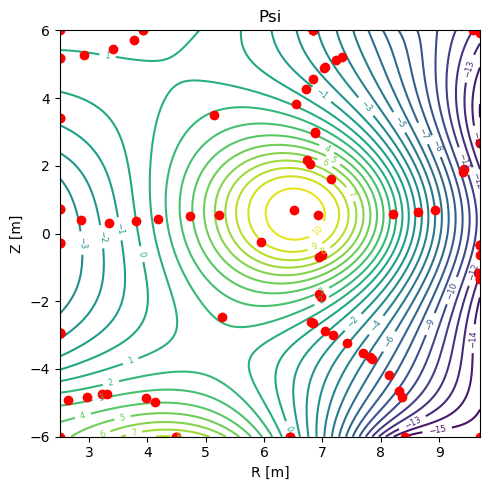

In [6]:
xx, yy = gedsk.get_meshgrid_for_psi(data)
gedsk.plotPoints_on_psi_contour(psi, xx, yy, points = all_critical_ponts)